# 1. Swedish demographic data

In [1]:
import pandas as pd

swe_table = pd.read_html(
    "https://sv.wikipedia.org/wiki/Sveriges_demografi", 
    match="Promille", 
    header=1,
)[0]
swe_table = swe_table.iloc[:-1, :-2]
swe_table.rename({"Vid utgången av år": "Year", "Folkmängd": "Population"}, axis=1, inplace=True)

swe_table


,Year,Population
0,1570,900 000
1,1650,1 225 000
2,1700,1 485 000
3,1720,1 350 000
4,1755,1 878 000
5,1815,2 465 000
6,1865,4 099 000
7,1900,5 140 000
8,2000,8 861 000
9,2020,10 379 000


In [2]:
swe_table.dtypes # strings

Year          object
Population    object
dtype: object

In [3]:
# convert year to int
swe_table["Year"] = swe_table["Year"].astype(int)

# conversion of Population to date fails because of whitespace (\xa0)
#\xa0 is treated as whitespace in the \s set
swe_table["Population"] = swe_table["Population"].replace(to_replace = "\s", value = "", regex=True).astype(int)

swe_table

,Year,Population
0,1570,900000
1,1650,1225000
2,1700,1485000
3,1720,1350000
4,1755,1878000
5,1815,2465000
6,1865,4099000
7,1900,5140000
8,2000,8861000
9,2020,10379000


In [4]:
print(f"{swe_table['Population'].mean()=}")
print(f"{swe_table['Population'].min()=}")
print(f"{swe_table['Population'].max()=}")


swe_table['Population'].mean()=3778200.0
swe_table['Population'].min()=900000
swe_table['Population'].max()=10379000


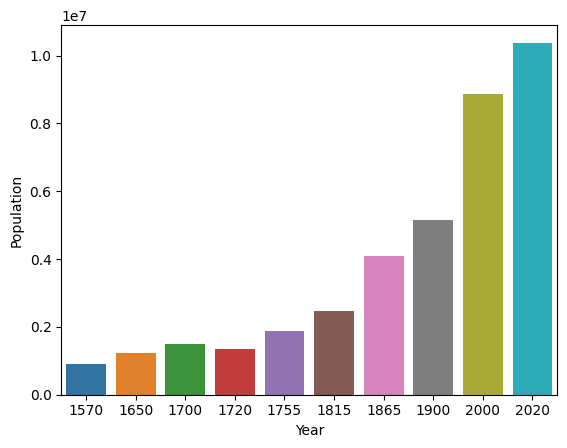

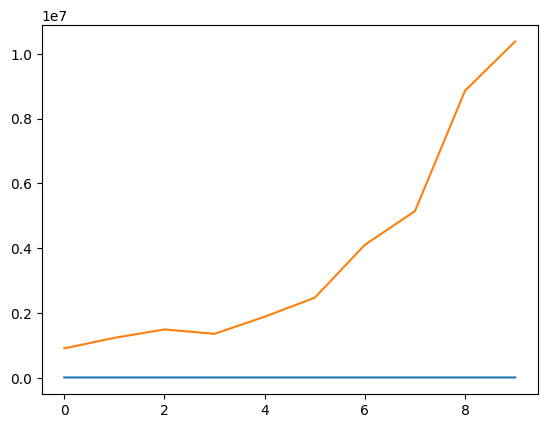

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(swe_table, x = "Year", y = "Population")

fig, ax = plt.figure(), plt.axes()
ax.plot(swe_table)